<a href="https://colab.research.google.com/github/purohitamann/Angular-project/blob/background-effect/BrainTumorClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import os
import pandas as pd # data manipulation
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # adplotting

In [61]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 81% 121M/149M [00:00<00:00, 191MB/s] 
100% 149M/149M [00:00<00:00, 185MB/s]


In [62]:
def getclasspaths(path) :
  classes = []
  class_paths = []
  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
    # Iterate through images in the label directory
      for image in os.listdir (label_path):
        image_path = os.path.join(label_path, image)
        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)
    # Create a DataFrame with the collected data
    df = pd.DataFrame({'Class Path': class_paths,'Class': classes})
  return df

In [63]:
tr_df = getclasspaths('/content/Training')

In [64]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_1248.jpg,glioma
1,/content/Training/glioma/Tr-gl_0416.jpg,glioma
2,/content/Training/glioma/Tr-gl_0619.jpg,glioma
3,/content/Training/glioma/Tr-gl_0329.jpg,glioma
4,/content/Training/glioma/Tr-gl_0055.jpg,glioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_1444.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0037.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0333.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_1200.jpg,pituitary


In [65]:
ts_df = getclasspaths('/content/Testing')

In [66]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0289.jpg,glioma
1,/content/Testing/glioma/Te-gl_0295.jpg,glioma
2,/content/Testing/glioma/Te-gl_0167.jpg,glioma
3,/content/Testing/glioma/Te-gl_0237.jpg,glioma
4,/content/Testing/glioma/Te-gl_0084.jpg,glioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0246.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0206.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0184.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0178.jpg,pituitary


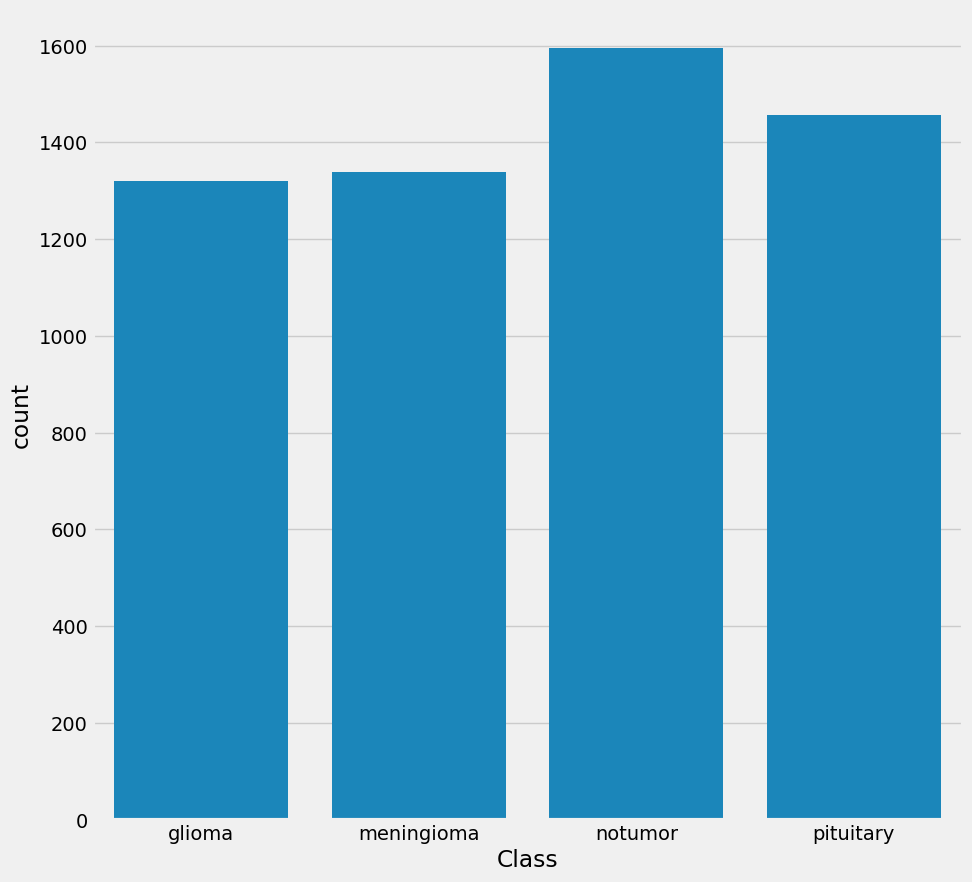

In [67]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

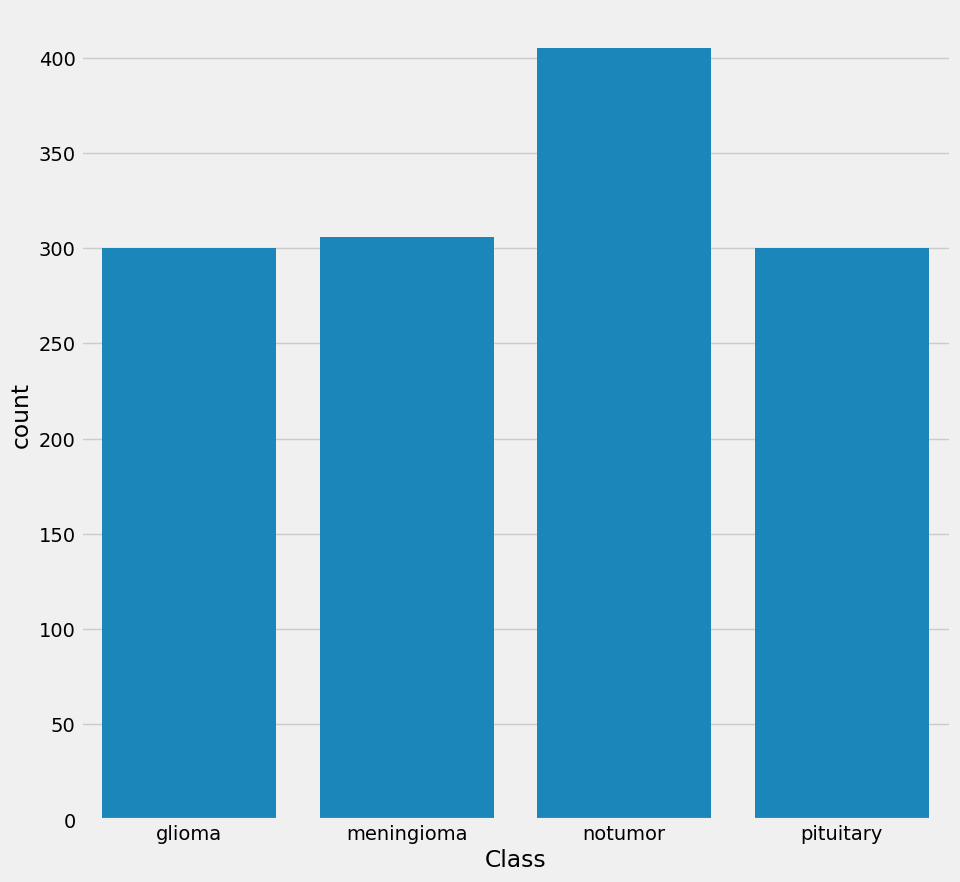

In [68]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [69]:
# Analysing the dataset

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential #Class from tensorflow allows to create a neural network, Layer by layer
from tensorflow.keras. layers import Dense, Dropout, Flatten
from tensorflow.keras. optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [71]:
# split the traing data into two category
# straidfy maintiant the amount to each data set in the same proportion as it exist in original dataset
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, random_state=42, stratify=ts_df['Class'])

In [72]:
valid_df

,Class Path,Class
843,/content/Testing/notumor/Te-no_0271.jpg,notumor
329,/content/Testing/meningioma/Te-me_0143.jpg,meningioma
776,/content/Testing/notumor/Te-no_0074.jpg,notumor
158,/content/Testing/glioma/Te-gl_0010.jpg,glioma
591,/content/Testing/meningioma/Te-me_0133.jpg,meningioma
...,...,...
477,/content/Testing/meningioma/Te-me_0015.jpg,meningioma
127,/content/Testing/glioma/Te-gl_0138.jpg,glioma
109,/content/Testing/glioma/Te-gl_0023.jpg,glioma
764,/content/Testing/notumor/Te-no_0212.jpg,notumor


In [73]:
ts_df

,Class Path,Class
402,/content/Testing/meningioma/Te-me_0033.jpg,meningioma
350,/content/Testing/meningioma/Te-me_0044.jpg,meningioma
966,/content/Testing/notumor/Te-no_0281.jpg,notumor
485,/content/Testing/meningioma/Te-meTr_0000.jpg,meningioma
40,/content/Testing/glioma/Te-gl_0184.jpg,glioma
...,...,...
678,/content/Testing/notumor/Te-no_0047.jpg,notumor
1133,/content/Testing/pituitary/Te-pi_0270.jpg,pituitary
717,/content/Testing/notumor/Te-no_0389.jpg,notumor
520,/content/Testing/meningioma/Te-me_0059.jpg,meningioma


In [74]:
#Preproscces
batch_size = 32

img_size = (299,299) # resziing
#rescaling the image and
image_generator = ImageDataGenerator(rescale=1./255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255) #



In [75]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path' ,
                                                 y_col='Class',
                                              batch_size=batch_size, target_size=img_size)

valid_gen = image_generator. flow_from_dataframe(valid_df, x_col='Class Path',
y_col='Class', batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen. flow_from_dataframe(ts_df, x_col='Class Path',
y_col='Class', batch_size=16,shuffle=False, target_size=img_size)

#preparing thedata

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


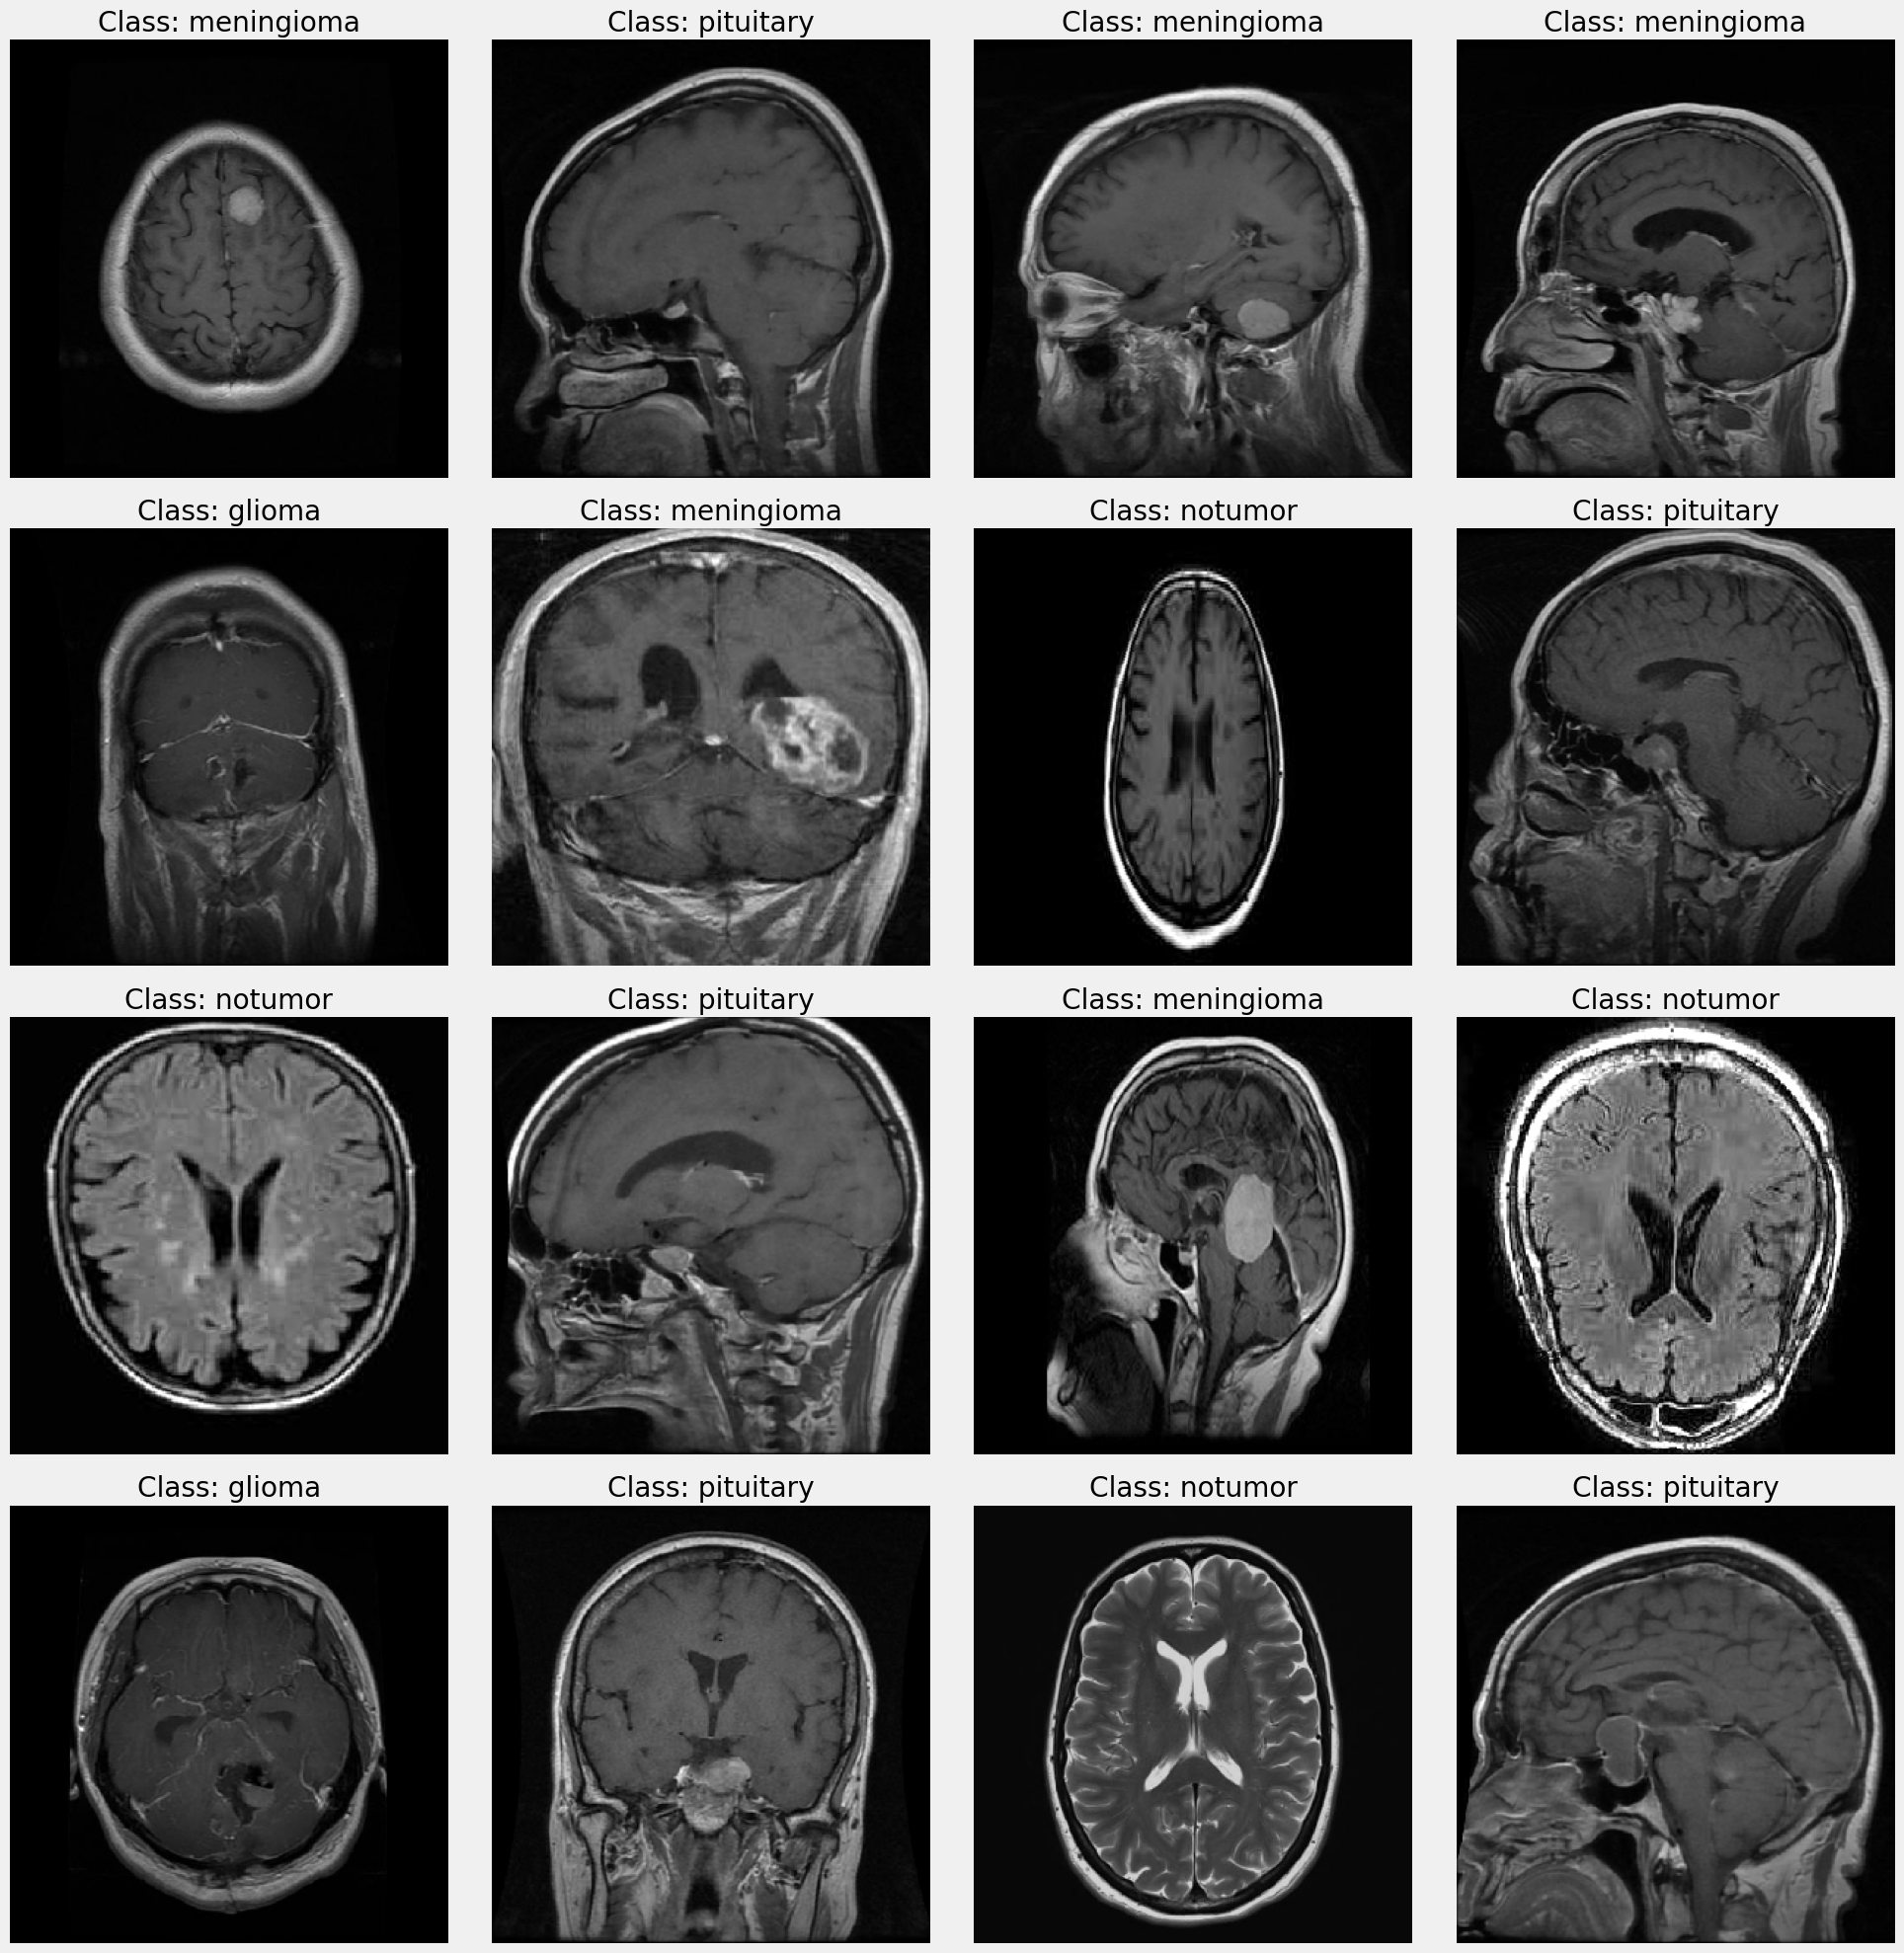

In [76]:
plt. figure(figsize=(20, 20))
for i in range (16):
  plt. subplot(4, 4, i+1)
  batch = next (tr_gen)
  image = batch [0] [0]
  label = batch [1] [0]
  plt. imshow(image)
  # Get the class index
  class_index = np. argmax(label)
  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices. keys ())
  class_indices = list(tr_gen.class_indices.values())
  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)
  # Get the class name using the index position
  class_name = class_names [index_position]
  plt. title(f"Class: {class_name}")
  plt.axis ('off')
plt.tight_layout ()
plt. show()


In [77]:
# Xception model ; image classification model buitl at google
image_shape = (299, 299, 3) #rgb format
base_model = tf.keras.applications.Xception(include_top= False, weights="imagenet", input_shape= image_shape, pooling='max ' )
model = Sequential([
  base_model,
  Flatten (),
  Dropout (rate= 0.3), #learnes to munch, so to avoid its permoance poorly on the new data, drops out neurons during learning to helpout genertalize new data
  Dense (128, activation='relu'),
  Dropout (rate= 0.25),
  Dense(4, activation='softmax')
])

In [78]:
# complie the model to get it ready for taining
model. compile(Adamax(learning_rate= 0.001), #admax - optimizer that is a smart asssitnat to help take how big of step it takes when update it's knowlege
     loss= 'categorical_crossentropy', # thisnfucntions is commonly used for classification as it penalizes the model heavily for mistakes
     metrics= ['accuracy', # % correct
     Precision(),# % tru posstive
     Recall()])# % true postive predicted correctly
# this optimzer is ustelk to find the lowest loss for the model, given a loss funciton, between predicted and actual output
# low learnignn rate means the model will take small steps when updating its weight, learning slowly but accutatly
# the longer the model takes to ttrain its costs more in terms of GPU


In [ ]:
hist = model.fit(tr_gen,epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 194s 876ms/step - accuracy: 0.2727 - loss: 1.8860 - precision_4: 0.2893 - recall_4: 0.0181 - val_accuracy: 0.3084 - val_loss: 1.3842 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/5
175/179 ━━━━━━━━━━━━━━━━━━━━ 2s 715ms/step - accuracy: 0.2722 - loss: 1.3846 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy','loss','precision','recall']
tr_metrics = {m: hist.history [m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}
# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m =='loss':
    idx = np. argmin (val_metrics [m])
  else:
    idx = np.argmax(val_metrics [m])
  best_epochs [m] = idx + 1
  best_values [m] = val_metrics [m] [idx]
# Plot metrics
plt. figure(figsize=(20, 12))
plt. style.use( 'fivethirtyeight' )
for i,metric in enumerate(metrics, 1):
  plt. subplot(2, 2, i)
  epochs = range (1,
  len (tr_metrics [metric]) + 1)
  plt. plot(epochs, tr_metrics [metric], 'r', label=f'Training {metric}')
  plt. plot (epochs,val_metrics [metric], 'g', label=f' Validation {metric}')
  plt. scatter(best_epochs[metric], best_values [metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs [metric]}')
  plt.title(f'Training and Validation {metric.title}')
  plt.xlabel( 'Epochs')
  plt. ylabel (metric.title())
  plt. legend ( )
  plt. grid (True)

plt.suptitle( 'Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
# if the accuracy keeps on increasing and the loss is constant that means the model is not learning at all.
train_score = model.evaluate(ts_gen, verbose=1) # tells how weell the model learn
valid_score = model. evaluate(valid_gen, verbose=1) # if the traing was effective
test_score = model. evaluate(ts_gen, verbose=1) # how well the model will perform in real world

print(f"Train Accuracy:{train_score [1]*100: .2f}%")
print(f"Train Loss: {train_score [0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score [1]*100: .2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score [1]*100: 2f}%")
print(f"Test Loss: {test_score [0]:.4f}")

In [ ]:
preds = model. predict (ts_gen)
y_pred = np.argmax (preds, axis=1)
class_dict ={
0:'glioma',
1: 'meningioma',
2: 'no_tumor',
3: 'pituitary',
}
# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict. keys())
plt. figure (figsize=(10,8))
sns. heatmap( cm,annot=True,fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# show how accurate the model is and how often its making mistakes

from PIL import Image

def predict (img_path: str) -> None:
  # Get class labels
  labels = list(class_dict. keys())
  # Create figure
  plt.figure(figsize=(6, 8))
  # Load and preprocess image
  img = Image. open (img_path)
  resized_img = img. resize( (299, 299))
  img_array = np.asarray(resized_img)
  img_array = np. expand_dims (img_array, axis=0) / 255.0
  # Get  model predictions
  predictions = model. predict (img_array)
  probabilities = list (predictions [0])
  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict [predicted_class_idx]
  # Plot original image
  plt. subplot (2, 1, 1)
  plt. imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")
  # Plot prediction probabilities
  plt. subplot(2, 1,
  2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel ("Probability", fontsize=15)
  plt. title("Class Probabilities")
  # Add probability labels to bars
  ax = plt.gca()
  ax. bar_label (bars, fmt="%.2f")
  plt. tight_layout()
  plt.show()
  print(f"\nPredicted tumor type: {predicted_class}")

In [ ]:
predict("/content/Testing/pituitary/Te-piTr_0000.jpg")

In [ ]:
predict("/content/Testing/pituitary/Te-piTr_0005.jpg")

In [ ]:
model.save_weights('xception_model.weights.h5')

In [ ]:
# light weight model, combonutional com CNN; Xception is also CNN with 36 CN layers

# trsining a small model will be easy to train and deploy, beacuse oit will require less memory and computing power and can run on cheaper hardware
# Custom CNN - 4 convolutional layer won't require NVdia G4

from tensorflow. keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers



In [ ]:
#Preproscces
batch_size = 16

img_size = (224,224) # resziing
#rescaling the image and
image_generator = ImageDataGenerator(rescale=1./255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255) #



In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path' ,
                                                 y_col='Class',
                                              batch_size=batch_size, target_size=img_size)

valid_gen = image_generator. flow_from_dataframe(valid_df, x_col='Class Path',
y_col='Class', batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
     y_col='Class', batch_size=16,shuffle=False, target_size=img_size)

#preparing thedata

In [ ]:
# Create a Sequential model
cnn_model = Sequential()
# Convolutional layers
cnn_model.add (Conv2D (512,(3,3), padding='same', input_shape=(224, 224,3), activation='relu'))
cnn_model.add (MaxPooling2D(pool_size=(2, 2)))

cnn_model.add (Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model. add (MaxPooling2D (pool_size=(2, 2)))
cnn_model. add (Dropout (0.25))

cnn_model.add (Conv2D (128,(3,3), padding='same', activation='relu'))
cnn_model.add (MaxPooling2D(pool_size=(2, 2)))
cnn_model. add (Dropout (0.25))

cnn_model. add (Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add (MaxPooling2D(pool_size=(2, 2)))
# Flatten the output for fully connected layers
cnn_model. add (Flatten ())
# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add (Dropout(0.35))
cnn_model.add (Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes
# Compile the model
cnn_model.compile (Adamax(learning_rate = 0.001), loss=' categorical_crossentropy', metrics= ['accuracy' ,Precision(), Recall()])
# Display the model summary
cnn_model. summary ()

In [ ]:
history= cnn_model.fit(tr_gen, epochs=5,validation_data=valid_gen)